# K-Nearest NeighborsProject 2

### Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [79]:
df = pd.read_csv('KNN_Project_Data')

In [80]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [83]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

                        Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

In [86]:
knn = KNeighborsClassifier(n_neighbors=2)

In [87]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [88]:
pred = knn.predict(X_test)

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76       147
           1       0.83      0.59      0.69       153

    accuracy                           0.73       300
   macro avg       0.76      0.74      0.73       300
weighted avg       0.76      0.73      0.73       300



                                PLOTING

In [90]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

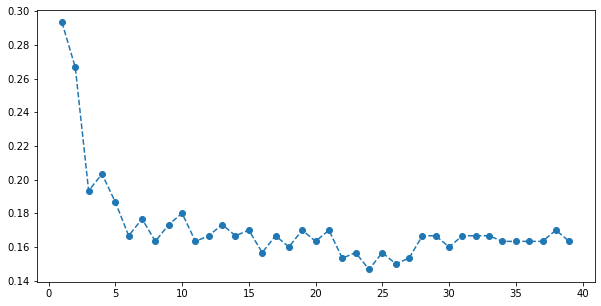

In [91]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error,ls='--',marker='o')

In [92]:
knn = KNeighborsClassifier(n_neighbors=error.index(min(error)))
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       147
           1       0.82      0.88      0.85       153

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [93]:
error.index(min(error))

23

In [94]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       147
           1       0.83      0.82      0.82       153

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

